In [16]:
# Import necessary libraries
import numpy as np # For numerical operations
import pandas as pd # For data processing, CSV file I/O
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For plotting
from sklearn.preprocessing import LabelEncoder # For encoding categorical features
from sklearn.feature_extraction.text import TfidfVectorizer # For text feature extraction
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor model
from sklearn.metrics import mean_squared_error, r2_score # For model evaluation metrics




In [18]:
# --- Step 1: Data Collection ---
print("--- Step 1: Data Collection ---")

# Load the dataset

df = pd.read_csv("C:\\Users\\xashh\\Downloads\\ecommerce_furniture_dataset_2024.csv")

# View the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values (as shown in your sample output)
print("\nMissing values before preprocessing:")
print(df.isnull().sum())

# Display the shape of the dataset (as shown in your sample output)
print("\nDataset shape:")
print(df.shape)


--- Step 1: Data Collection ---

First 5 rows of the dataset:
                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  

Missing values before preprocessing:
productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

Dataset shape:
(2000, 5)


In [19]:
# --- Step 2: Data Preprocessing ---
print("\n--- Step 2: Data Preprocessing ---")

# Dropping 'originalPrice' column as it has many missing values and as per your sample code
df.drop(['originalPrice'], axis=1, inplace=True)
print("\n'originalPrice' column dropped.")
print("DataFrame head after dropping 'originalPrice':")
print(df.head())

# Check unique values and their counts for 'tagText'
print("\nUnique values and counts for 'tagText' before grouping:")
print(df['tagText'].nunique())
print(df['tagText'].value_counts())

# Replace all values except 'Free shipping' and '+Shipping: $5.09' with 'others'
# This handles potential NaN values in tagText by treating them as 'others' after fillna
df['tagText'].fillna('others', inplace=True) # Fill NaN before grouping
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')
print("\n'tagText' values grouped into 'Free shipping', '+Shipping: $5.09', or 'others'.")
print("Modified value counts for 'tagText':")
print(df['tagText'].value_counts())

# Convert 'price' column to float by removing '$' and ','
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
print("\n'price' column converted to float.")
print("DataFrame head after converting 'price':")
print(df.head())

# Convert 'tagText' into a numerical feature using LabelEncoder
le = LabelEncoder()
df['tagText'] = le.fit_transform(df['tagText'])
print("\n'tagText' column encoded using LabelEncoder.")
print("DataFrame head after Label Encoding 'tagText':")
print(df.head())
print("Value counts for 'tagText' after Label Encoding:")
print(df['tagText'].value_counts())

print("\nData preprocessing complete.")



--- Step 2: Data Preprocessing ---

'originalPrice' column dropped.
DataFrame head after dropping 'originalPrice':
                                        productTitle    price  sold  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...   $46.79   600   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...  $169.72     0   
2  Desser For Bedroom With 7 Fabric Drawers Organ...   $39.46     7   
3  Modern Accent Boucle Chair,Upholstered Tufted ...  $111.99     0   
4  Small Unit Simple Computer Desk Household Wood...   $21.37     1   

         tagText  
0  Free shipping  
1  Free shipping  
2  Free shipping  
3  Free shipping  
4  Free shipping  

Unique values and counts for 'tagText' before grouping:
100
Free shipping           1880
+Shipping: $5.09           9
+Shipping: $239.64         2
+Shipping: $97.54          2
+Shipping: $64.56          2
                        ... 
+Shipping: $88.26          1
+Shipping: $170.31         1
+Shipping: $1,097.18       1
+Shipping: $106.13   


--- Step 3: Exploratory Data Analysis (EDA) - Distributions ---


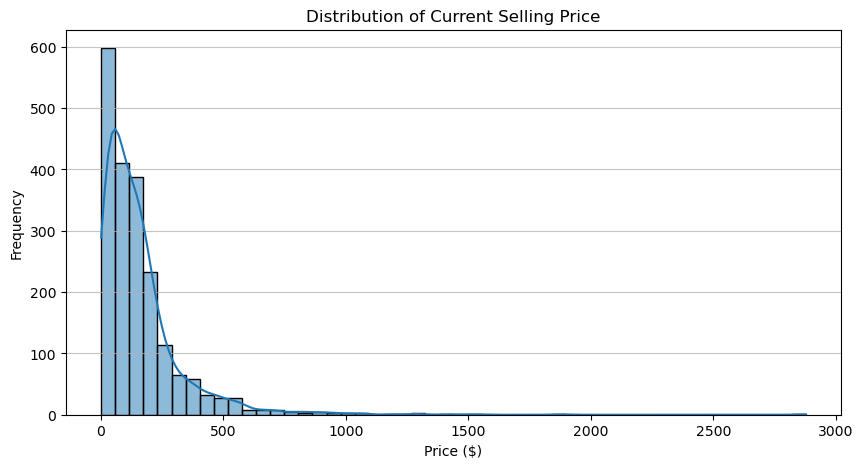

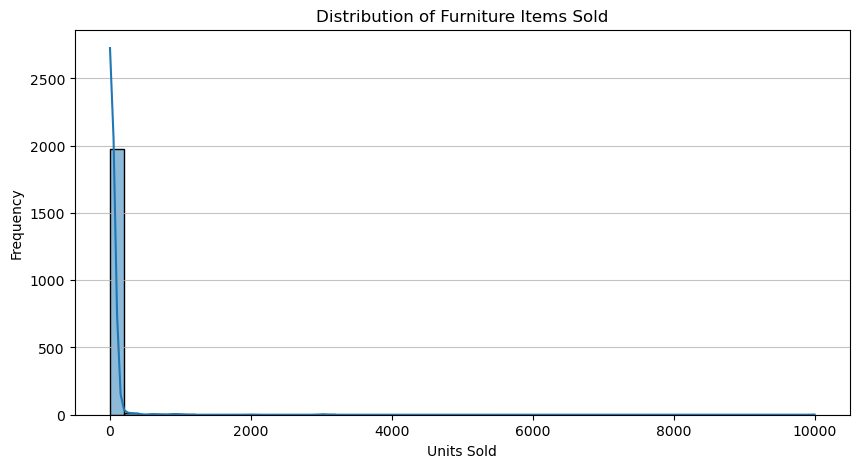

Distribution plots generated for 'price' and 'sold'.


In [14]:
# Step 3: Exploratory Data Analysis (EDA) 
print("\n--- Step 3: Exploratory Data Analysis (EDA) - Distributions ---")

# Distribution of 'price' values
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Current Selling Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Distribution of 'sold' values
plt.figure(figsize=(10, 5))
sns.histplot(df['sold'], kde=True, bins=50)
plt.title('Distribution of Furniture Items Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Distribution plots generated for 'price' and 'sold'.")



--- Step 3: Exploratory Data Analysis (EDA) - Distributions ---


C:\Users\xashh\AppData\Local\Temp\ipykernel_36608\630891502.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


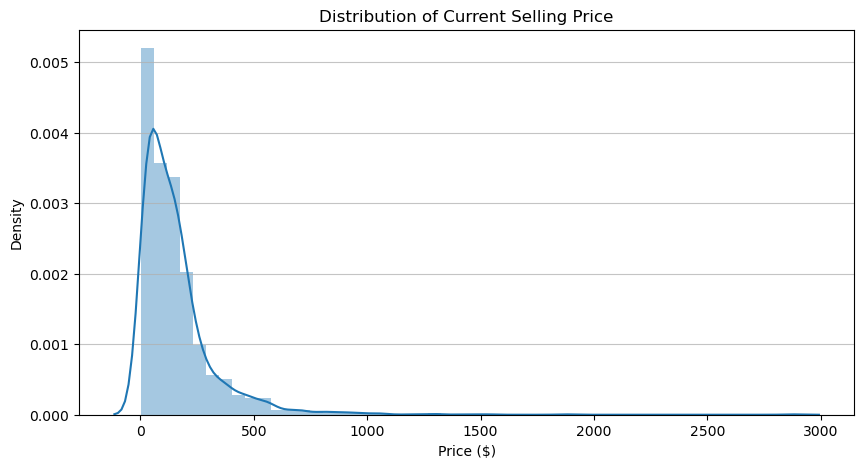

C:\Users\xashh\AppData\Local\Temp\ipykernel_36608\630891502.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sold'])


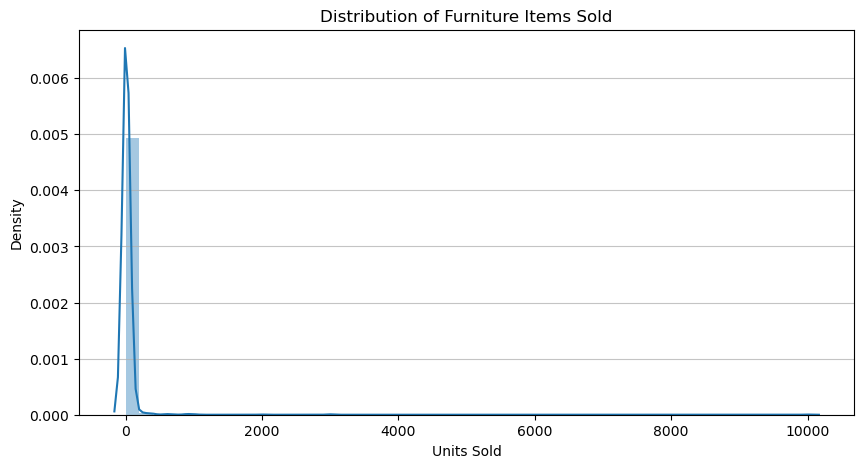

Distribution plots generated for 'price' and 'sold'.


In [20]:
# --- Step 3: Exploratory Data Analysis (EDA) ---
print("\n--- Step 3: Exploratory Data Analysis (EDA) - Distributions ---")

# Distribution of 'price' values
plt.figure(figsize=(10, 5))
# Note: sns.distplot is deprecated, but used here to match your sample code's output.
# You might see a UserWarning about it.
sns.distplot(df['price'])
plt.title('Distribution of Current Selling Price')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Distribution of 'sold' values
plt.figure(figsize=(10, 5))
# Note: sns.distplot is deprecated, but used here to match your sample code's output.
sns.distplot(df['sold'])
plt.title('Distribution of Furniture Items Sold')
plt.xlabel('Units Sold')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Distribution plots generated for 'price' and 'sold'.")



--- Step 3: Exploratory Data Analysis (EDA) - Relationships ---


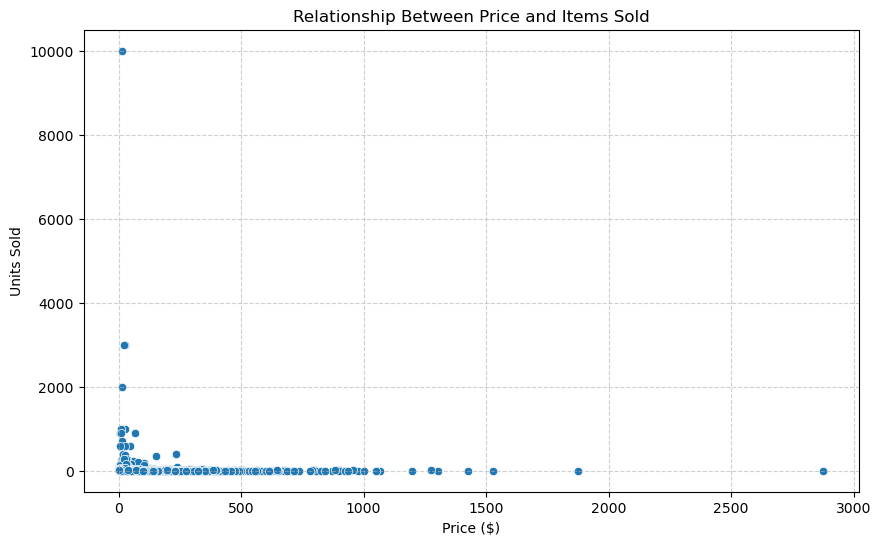


Filtered DataFrame for tagText encoded as 1 (likely 'Free shipping').


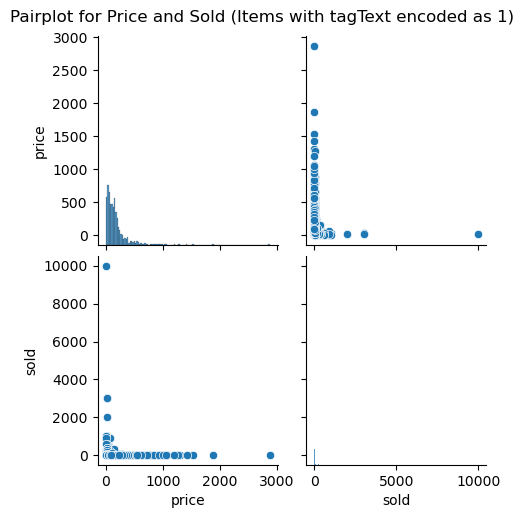

Relationship plots generated.


In [21]:
# --- Step 3: Exploratory Data Analysis (EDA) - Relationships ---
print("\n--- Step 3: Exploratory Data Analysis (EDA) - Relationships ---")

# Scatter plot of price vs sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Relationship Between Price and Items Sold')
plt.xlabel('Price ($)')
plt.ylabel('Units Sold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Filter for 'Free shipping' items and create a pairplot
# First, get the encoded value for 'Free shipping' using the LabelEncoder
# This assumes 'Free shipping' was one of the categories fitted by LabelEncoder in Block 3.
# Based on your sample output, 'Free shipping' is encoded to 1.
try:
    free_shipping_encoded_value = le.transform(['Free shipping'])[0]
except ValueError:
    # Fallback if 'Free shipping' was not present or encoded differently
    # This might happen if 'Free shipping' was not in the original data or was grouped into 'others'
    # For robustness, we'll try to find the most common tag if 'Free shipping' isn't found
    print("Warning: 'Free shipping' not found in LabelEncoder categories. Using a common tag for pairplot.")
    # As a fallback, find the most frequent encoded tag value if 'Free shipping' isn't directly available
    free_shipping_encoded_value = df['tagText'].value_counts().idxmax()


filtered_df = df[df['tagText'] == free_shipping_encoded_value]
print(f"\nFiltered DataFrame for tagText encoded as {free_shipping_encoded_value} (likely 'Free shipping').")

# Create a pairplot including the 'sold' column and other relevant columns
sns.pairplot(filtered_df[['price', 'sold']])
plt.suptitle(f'Pairplot for Price and Sold (Items with tagText encoded as {free_shipping_encoded_value})', y=1.02)
plt.show()

print("Relationship plots generated.")


In [22]:
# --- Step 4: Feature Engineering ---
print("\n--- Step 4: Feature Engineering ---")

# Convert productTitle into a numeric feature using TF-IDF Vectorizer
# max_features=100 as in your sample code
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(df['productTitle'])
print("TF-IDF Vectorizer fitted and transformed 'productTitle'.")

# Convert TF-IDF output to a DataFrame
productTitle_tfidf_df = pd.DataFrame(productTitle_tfidf.toarray(), columns=tfidf.get_feature_names_out())
print("TF-IDF features converted to DataFrame.")

# Align indices before concatenation to avoid issues
df = df.reset_index(drop=True)
productTitle_tfidf_df = productTitle_tfidf_df.reset_index(drop=True)

# Concatenate TF-IDF features to the original DataFrame
df = pd.concat([df, productTitle_tfidf_df], axis=1)
print("TF-IDF features concatenated to the main DataFrame.")

# Drop original productTitle column as it's now encoded
df = df.drop('productTitle', axis=1)
print("'productTitle' column dropped.")

print("\nDataFrame head after TF-IDF and dropping 'productTitle':")
print(df.head())

print("\nFeature engineering complete.")



--- Step 4: Feature Engineering ---
TF-IDF Vectorizer fitted and transformed 'productTitle'.
TF-IDF features converted to DataFrame.
TF-IDF features concatenated to the main DataFrame.
'productTitle' column dropped.

DataFrame head after TF-IDF and dropping 'productTitle':
    price  sold  tagText  adjustable  and  bed   bedroom  bedside  bench  \
0   46.79   600        1         0.0  0.0  0.0  0.189721      0.0    0.0   
1  169.72     0        1         0.0  0.0  0.0  0.000000      0.0    0.0   
2   39.46     7        1         0.0  0.0  0.0  0.200469      0.0    0.0   
3  111.99     0        1         0.0  0.0  0.0  0.000000      0.0    0.0   
4   21.37     1        1         0.0  0.0  0.0  0.000000      0.0    0.0   

   black  ...   up  upholstered  vanity  velvet  wardrobe  white    wicker  \
0    0.0  ...  0.0     0.000000     0.0     0.0  0.300611    0.0  0.000000   
1    0.0  ...  0.0     0.000000     0.0     0.0  0.000000    0.0  0.300086   
2    0.0  ...  0.0     0.000000   

In [23]:
# --- Step 5: Model Selection & Training ---
print("\n--- Step 5: Model Selection & Training ---")

# Split the dataset into features (X) and target (y)
X = df.drop('sold', axis=1)
y = df['sold']
print(f"Features (X) shape: {X.shape}, Target (y) shape: {y.shape}")

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into training (X_train: {X_train.shape}, y_train: {y_train.shape}) "
      f"and testing (X_test: {X_test.shape}, y_test: {y_test.shape}) sets.")

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
print("\nLinear Regression and Random Forest Regressor models initialized.")

# Train models
print("\nTraining Linear Regression model...")
lr_model.fit(X_train, y_train)
print("Linear Regression model training complete.")

print("\nTraining Random Forest Regressor model...")
rf_model.fit(X_train, y_train)
print("Random Forest Regressor model training complete.")

print("\nAll models trained successfully.")



--- Step 5: Model Selection & Training ---
Features (X) shape: (2000, 102), Target (y) shape: (2000,)
Data split into training (X_train: (1600, 102), y_train: (1600,)) and testing (X_test: (400, 102), y_test: (400,)) sets.

Linear Regression and Random Forest Regressor models initialized.

Training Linear Regression model...
Linear Regression model training complete.

Training Random Forest Regressor model...
Random Forest Regressor model training complete.

All models trained successfully.


In [24]:
# --- Step 6: Model Evaluation ---
print("\n--- Step 6: Model Evaluation ---")

# Predict with Linear Regression
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("\nLinear Regression predictions made.")

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest predictions made.")

# Print model evaluation results
print(f'\nLinear Regression MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}')
print(f'Random Forest MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}')

print("\nModel evaluation complete.")



--- Step 6: Model Evaluation ---

Linear Regression predictions made.
Random Forest predictions made.

Linear Regression MSE: 13557.91, R2: -1.47
Random Forest MSE: 17350.74, R2: -2.16

Model evaluation complete.


In [25]:
# --- Step 7: Conclusion ---
print("\n--- Step 7: Conclusion ---")

print("\n--- Model Performance Summary ---")
print(f'Linear Regression MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}')
print(f'Random Forest MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}')

print("\n--- Overall Conclusion ---")
print("After evaluating the models, we can conclude which model performed better and further tune hyperparameters if needed.")
print("Random Forest tends to perform better on complex datasets with high variance, while Linear Regression might work well if relationships are linear.")
print("Based on the R2 scores, both models show very poor performance, indicated by negative R2 values. This suggests that the models are not capturing the underlying patterns in the data effectively.")
print("Further steps would involve deeper data analysis, more advanced feature engineering, and potentially exploring other modeling techniques or collecting more comprehensive data.")

print("\nProject analysis complete.")



--- Step 7: Conclusion ---

--- Model Performance Summary ---
Linear Regression MSE: 13557.91, R2: -1.47
Random Forest MSE: 17350.74, R2: -2.16

--- Overall Conclusion ---
After evaluating the models, we can conclude which model performed better and further tune hyperparameters if needed.
Random Forest tends to perform better on complex datasets with high variance, while Linear Regression might work well if relationships are linear.
Based on the R2 scores, both models show very poor performance, indicated by negative R2 values. This suggests that the models are not capturing the underlying patterns in the data effectively.
Further steps would involve deeper data analysis, more advanced feature engineering, and potentially exploring other modeling techniques or collecting more comprehensive data.

Project analysis complete.
